# Exercise 18: Principal component methods

This homework assignment is designed to give you an intuition on principal component approaches to understanding high dimensional statistical relationships.

Like earlier homework, you will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading data (1 point)

We are going to look for low dimensional relationships between brain volume measures and working memory capacity.

First, we will need to load the `pls`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [ ]:
# WRITE YOUR CODE HERE
#install.packages('pls')
library(tidyverse)
library(pls)

Use `read.csv` function to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file in the **hcp_data** folder. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only includes the Flanker Task performance (`Flanker_Unadj`) and *all* freesurfer **volume** measures for the right and left hemispheres together. Remove both "na's" and any columns that consist of only zeros.

Hint: Look up using the `ends_with` function to only select variables that end with "_Vol"

Use the `head` function to look at the first few rows of each data frame. 

In [13]:
# WRITE YOUR CODE HERE

# read in raw csv
hcp_data <- read.csv('unrestricted_trimmed_1_7_2020_10_50_44.csv')
head(hcp_data)

# create data frame d1 with specified variables
d1 <- hcp_data %>%
  select(c('Flanker_Unadj',ends_with("_Vol"))) %>% # retain only flanker and volume measures
  drop_na() %>% # remove NA values
  select_if(~!all(. == 0)) # remove columns with only zeros 

head(d1)

,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


,Flanker_Unadj,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,⋯,FS_R_Vessel_Vol,FS_R_ChoroidPlexus_Vol,FS_5thVent_Vol,FS_WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,130.42,1864518,1406924,304488,305634,610122,70240,807245,1239692,269963,⋯,80,1613,0,1269,325,800,409,569,522,813
2,112.56,1512540,1109710,240030,243207,483238,56623,664124,957615,203472,⋯,70,1007,0,1155,195,1029,526,578,576,649
3,121.18,1684117,1280171,260695,265243,525938,63869,726206,1106881,247504,⋯,88,1303,0,1279,302,972,589,528,471,858
4,126.53,1816044,1321362,276506,278002,554508,74869,762308,1155067,254742,⋯,81,909,0,1154,296,1065,618,838,729,1072
5,101.85,1437868,1053766,203718,210539,414257,58813,579632,916973,213012,⋯,75,1215,3,377,235,1057,591,538,430,849
6,107.04,1512727,1126655,242489,248807,491296,62092,665024,984952,205342,⋯,93,1331,17,554,258,1033,494,487,489,992


---
## 2. Correlational structure (4 points)

(a) Take a look at the correlation between all of the freesurfer volume measures ("FS_") using the `cor` function. Create a new variable called `fs_cor` that is the correlation matrix for only the freesurfer volumes

In [22]:
# WRITE YOUR CODE HERE

# calculate pairwise correlation matrix using cor() 
fs_cor <- cor(d1[,-1]) # do not include Flanker_Unadj
dim(fs_cor) # check matrix dimensions

[1] 52 52

(b) Load (and install locally if needed) the `reshape2` library in order to use the `melt` function on the new `fs_cor` object. Use `head` to show the new, melted `fs_cor` object.

In [23]:
# WRITE YOUR CODE HERE
#install.packages('reshape2')
library(reshape2)

# convert from wide to long format
fs_cor <- melt(fs_cor)
head(fs_cor)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,FS_IntraCranial_Vol,FS_IntraCranial_Vol,1.0000000
2,FS_BrainSeg_Vol,FS_IntraCranial_Vol,0.8977578
3,FS_LCort_GM_Vol,FS_IntraCranial_Vol,0.8400174
4,FS_RCort_GM_Vol,FS_IntraCranial_Vol,0.8439151
5,FS_TotCort_GM_Vol,FS_IntraCranial_Vol,0.8452780
6,FS_SubCort_GM_Vol,FS_IntraCranial_Vol,0.7885140


Plot the correlation as a heatmap using `ggplot2`.

Hint: use the `scale_fill_gradient2` function to scale the colors between red and blue, capping the values at -1 and +1.

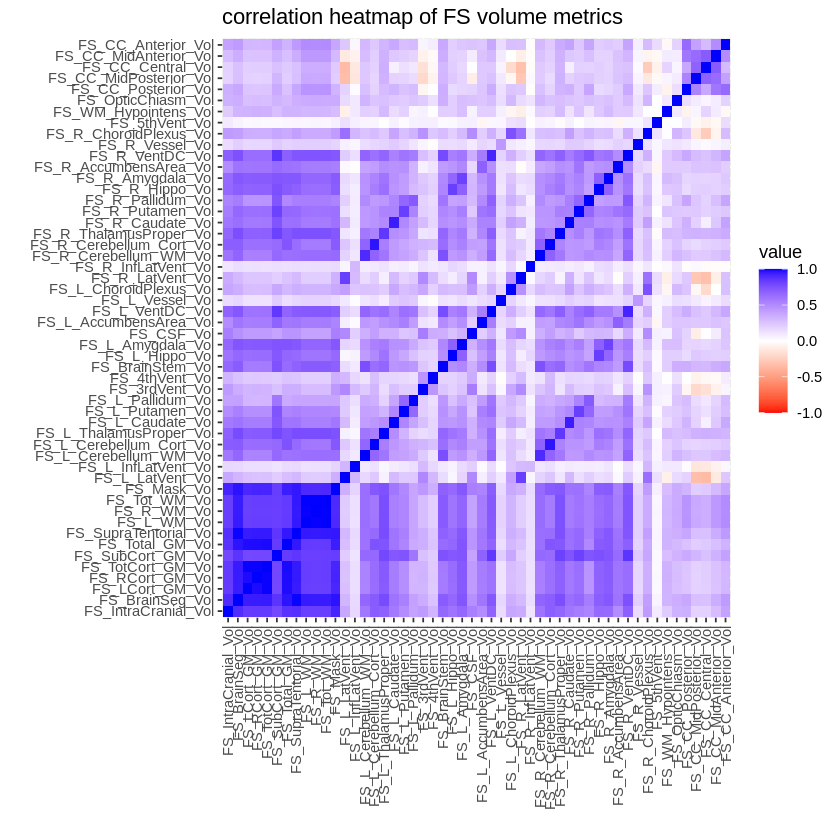

In [27]:
# WRITE YOUR CODE HERE
ggplot(fs_cor, aes(x=Var1,y=Var2, fill=value)) +
  geom_tile() +
  scale_x_discrete(guide = guide_axis(angle = 90)) +
  scale_fill_gradient2(low='red',high='blue',limits = c(-1, 1)) +
  labs(title='correlation heatmap of FS volume metrics', x='', y='')

What patterns do you see in the correlations?

> There is a clear correlational structure inherent in the FS volume metrics. The total cortical volume metrics are extremely positively correlated as well as the measures across the two hemispheres. 
> 


---
## 3. Principal component analysis (3 points)

Let's see how many principal components explain at *at least* 95% of the data.

(a) Create a new object called `fs_d.pca` using the `princomp` function (do not forget to scale the data).


In [ ]:
# WRITE YOUR CODE HERE

# calculate PCA on d1
fs_d.pca <- princomp(d1[,-1], cor = TRUE) # cor = TRUE centers and scales data for PCA

# print out principal components
pca_out <- summary(fs_d.pca)

(b) Calculate the cumulative variance explained (not unique variance explained as in the tutorial) across the principal components and plot the results using `ggplot`.

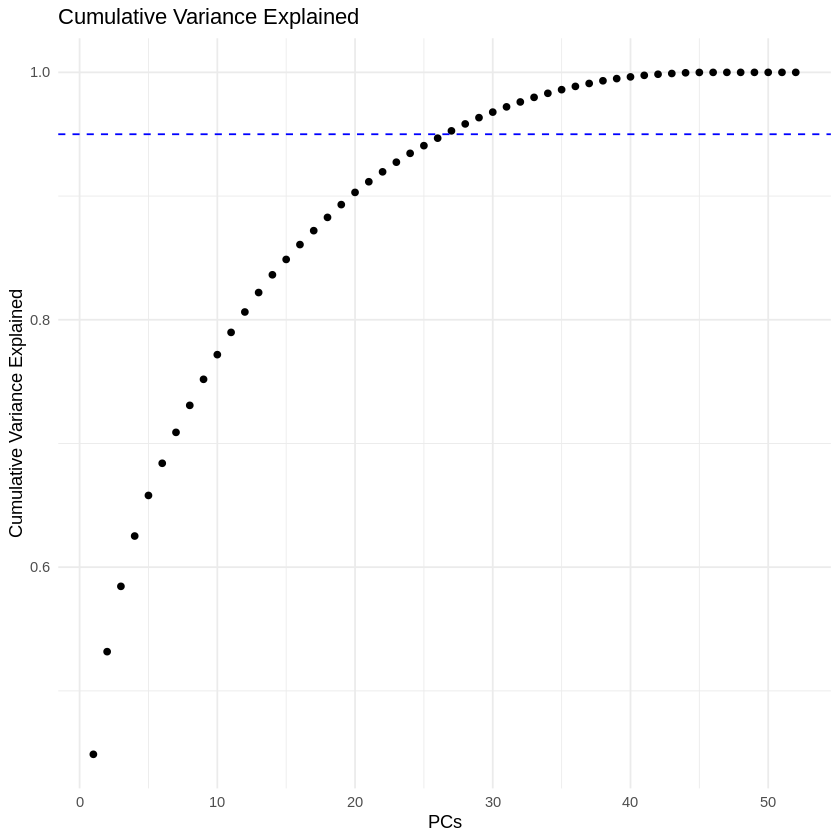

In [74]:
# WRITE YOUR CODE HERE

# calculate cumulative variance explained from pca output
cum_var_exps <- cumsum(pca_out$sdev^2 / sum(pca_out$sdev^2))

# plot cumulative variance explained
ggplot(data.frame(x=seq(length(cum_var_exps)), y=cum_var_exps), aes(x, y)) +
  geom_point() +
  geom_hline(yintercept = 0.95, linetype='dashed', color='blue') +
  theme_minimal() +
  labs(title='Cumulative Variance Explained',x='PCs',y='Cumulative Variance Explained')

(c) Determine exactly how many principal components explain at least 95% of the variance.

Hint: Look up the `which` function. 

In [75]:
# WRITE YOUR CODE HERE

# calculate how many PCs are needed to explain 95% of variance
threshold_pcs <- min(which(cum_var_exps > 0.95))
threshold_pcs

[1] 27

What does this tell you about the underlying dimensionality of the brain volume measures? 

> These results show us that a 27-dimensional subspace captures the vast majority of the variance in brain volume measures. This is likely due to the correlational structure observed in the heatmap constructed prior to the PCA. This could indicate that we have some superfluous volume measures.
>  


---
## 4. Associating with Flanker task peformance (4 points)

Now apply PCR to the `d1` object you created at the beginning (which includes the Flanker task scores) to find how freesurfer volumes predict Flanker task performance. Set the random seed to "2". Use cross-validation as the validation type and don't forget to scale your data. Show the `summary` of the model fit.

Hint: If you receive an error applying the "scale=TRUE" flag, then you likely still have columns of all zeros somewhere in your data table.

In [69]:
# WRITE YOUR CODE HERE
set.seed(2)
pcr.fit=pcr(Flanker_Unadj~., data=d1 ,scale=TRUE, validation ="CV")
summary(pcr.fit)

Data: 	X dimension: 1113 52 
	Y dimension: 1113 1
Fit method: svdpc
Number of components considered: 52

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           10.08    9.925    9.924    9.933    9.922    9.924    9.912
adjCV        10.08    9.924    9.923    9.932    9.920    9.922    9.910
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       9.889    9.891    9.893     9.896     9.909     9.918     9.934
adjCV    9.886    9.887    9.890     9.892     9.904     9.913     9.927
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        9.941     9.945     9.934     9.899     9.896     9.907     9.914
adjCV     9.934     9.939     9.928     9.889     9.886     9.897     9.903
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV        9.922     9.930     9.939     9.955     9.968     9.971     9.979
adjCV     9.911  

(b) Use the `validationplot` function to evaluate the bias-variance tradeoff using the cross-validated mean squared-error for each component.

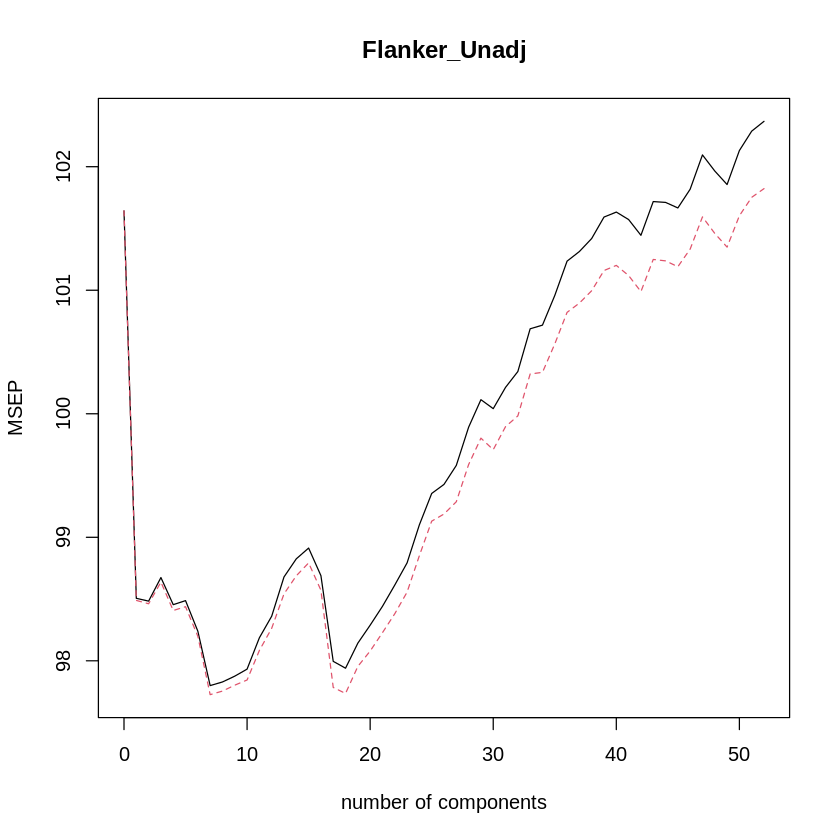

In [76]:
# WRITE YOUR CODE HERE

# plot mean squared error of prediction against no. PCs
validationplot(pcr.fit, val.type="MSEP") # use mean squared error

(c) Extract the MSEP values of the cross validated fit ("CV" not "adj_CV") from the model object using the `MSEP` funtion. Create a new array of these values. Use the `drop` function to remove the singleton dimension (the original array is 2x1x53 and we want a 2x53 object). Find the minimum value of the first row (the "CV").

In [103]:
# WRITE YOUR CODE HERE

# extract CV MSEP values
mseps <- MSEP(pcr.fit, estimate = "CV") # only cross validated MSEP values
mseps <- drop(mseps) # remove singleton dimension

# find no. of PCs with minimum CV MSEP
min_msep <- which.min(mseps[[1]])
min_msep

[1] 8

What what does this plot tell you about how many components best explain variance in Flanker task performance? 

> Based on both the validationplot and the minimum mean squared error of prediction, it seems that 8 components best explain the variance in Flanker task performance.

---
## 5. Reflection (2 points)

Compare the number of components that explain variance in X alone (the brain volumes) to the number of components that explain performance in the Flanker task. What does the difference in these two numbers tell you about how variation in brain volumes relates to task performance?

> Given that only 8 components were required to best explain performance in the Flanker task compared to the 27 components necessary to capture 95% of the variance in brain volume measures, it seems that there is a large amount of variation in brain volumes that is unrelated to Flanker task performance. This seems to also be reflected in the variance in flanker task performance explained remaining low at larger numbers of components (as reflected in the summary of the PCR).
> 

**DUE:** 5pm EST, April 17, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*